In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('us-air-carrier-traffic-statistic_Forecast.csv')

In [5]:
df

,Month,U.S. Air Carrier Traffic Statistics - Revenue Passenger Miles
0,1996-01,41972194
1,1996-02,42054796
2,1996-03,50443045
3,1996-04,47112397
4,1996-05,49118248
...,...,...
195,2012-04,68669228
196,2012-05,71887523
197,2012-06,76760759
198,2012-07,80499353


In [6]:
df.shape

(200, 2)

In [7]:
df.isnull().sum()

Month                                                            0
U.S. Air Carrier Traffic Statistics - Revenue Passenger Miles    0
dtype: int64

In [8]:
df.columns

Index(['Month', 'U.S. Air Carrier Traffic Statistics - Revenue Passenger Miles'], dtype='object')

In [10]:
df.rename(columns={'U.S. Air Carrier Traffic Statistics - Revenue Passenger Miles':'RPM'}, inplace=True)

In [11]:
df.head()

,Month,RPM
0,1996-01,41972194
1,1996-02,42054796
2,1996-03,50443045
3,1996-04,47112397
4,1996-05,49118248


In [12]:
df.dtypes

Month    object
RPM       int64
dtype: object

In [13]:
df['Month'] = pd.to_datetime(df['Month'])

In [14]:
df.dtypes

Month    datetime64[ns]
RPM               int64
dtype: object

In [15]:
df.set_index('Month', inplace=True)

In [16]:
df

,RPM
Month,
1996-01-01,41972194
1996-02-01,42054796
1996-03-01,50443045
1996-04-01,47112397
1996-05-01,49118248
...,...
2012-04-01,68669228
2012-05-01,71887523
2012-06-01,76760759


In [21]:
df_train = df.iloc[0:160, :]

In [22]:
df_train

,RPM
Month,
1996-01-01,41972194
1996-02-01,42054796
1996-03-01,50443045
1996-04-01,47112397
1996-05-01,49118248
...,...
2008-12-01,63503416
2009-01-01,58373786
2009-02-01,53506580


In [32]:
df_test = df.iloc[160:, :]

In [33]:
df_test

,RPM
Month,
2009-05-01,65868254
2009-06-01,71350227
2009-07-01,77136799
2009-08-01,74614773
2009-09-01,61435354
2009-10-01,64274739
2009-11-01,59011015
2009-12-01,63231672
2010-01-01,59651061


In [36]:
df_test.shape

(40, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

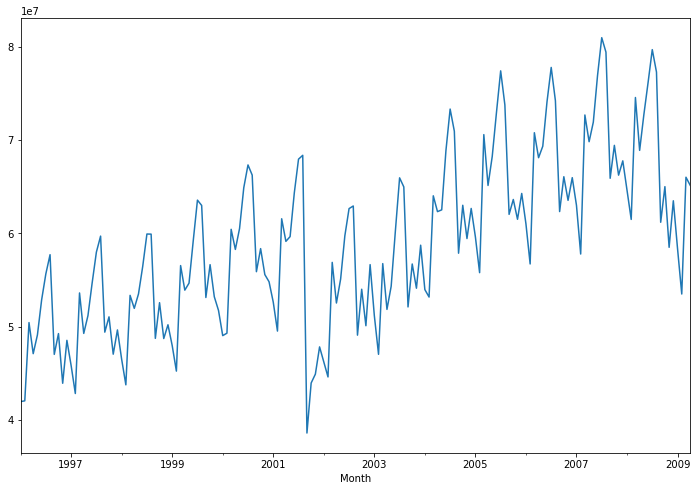

In [37]:
df_train['RPM'].plot(figsize=(12, 8))
plt.show

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\compaq\AppData\Local\Temp/ipykernel_8708/1583136172.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose = seasonal_decompose(df_train['RPM'], model='multiplicative', freq = 12)


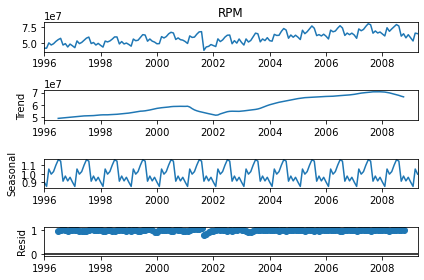

In [39]:
decompose = seasonal_decompose(df_train['RPM'], model='multiplicative', freq = 12)
decompose.plot()
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

In [45]:
def adfuller_test(x):
    result = adfuller(x)
    labels = ['ADF Test Statistic', 'p-value', 'lags_used', 'No. of observations used']
    for a, b in zip(result, labels):
        print (b + ' : ' + str(a))
    if result[1] <=0.05:
        print ('Data is stationary')
    else:
        print ('Data is non_stationary')

In [46]:
adfuller_test(df_train['RPM'])

ADF Test Statistic : -1.4470235313839424
p-value : 0.5595365804533373
lags_used : 13
No. of observations used : 146
Data is non_stationary


In [47]:
df_train['lag12'] = df_train['RPM'].shift(-12)

C:\Users\compaq\AppData\Local\Temp/ipykernel_8708/2806038124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['lag12'] = df_train['RPM'].shift(-12)


In [48]:
df_train['Seasonal_1st_diff'] = df_train['RPM'] - df_train['lag12']

C:\Users\compaq\AppData\Local\Temp/ipykernel_8708/103780028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Seasonal_1st_diff'] = df_train['RPM'] - df_train['lag12']


In [49]:
df_train

,RPM,lag12,Seasonal_1st_diff
Month,,,
1996-01-01,41972194,45850623.0,-3878429.0
1996-02-01,42054796,42838949.0,-784153.0
1996-03-01,50443045,53620994.0,-3177949.0
1996-04-01,47112397,49282817.0,-2170420.0
1996-05-01,49118248,51191842.0,-2073594.0
...,...,...,...
2008-12-01,63503416,NaN,NaN
2009-01-01,58373786,NaN,NaN
2009-02-01,53506580,NaN,NaN


In [50]:
df_train.dropna(inplace=True)

C:\Users\compaq\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [51]:
df_train

,RPM,lag12,Seasonal_1st_diff
Month,,,
1996-01-01,41972194,45850623.0,-3878429.0
1996-02-01,42054796,42838949.0,-784153.0
1996-03-01,50443045,53620994.0,-3177949.0
1996-04-01,47112397,49282817.0,-2170420.0
1996-05-01,49118248,51191842.0,-2073594.0
...,...,...,...
2007-12-01,67782533,63503416.0,4279117.0
2008-01-01,64667106,58373786.0,6293320.0
2008-02-01,61504426,53506580.0,7997846.0


In [52]:
adfuller_test(df_train['Seasonal_1st_diff'])

ADF Test Statistic : -2.4067901590646854
p-value : 0.1398291009680318
lags_used : 12
No. of observations used : 135
Data is non_stationary


In [53]:
df_train['Seasonal_1st_diff (lag1)'] = df_train['Seasonal_1st_diff'].shift(-1)

C:\Users\compaq\AppData\Local\Temp/ipykernel_8708/761220970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Seasonal_1st_diff (lag1)'] = df_train['Seasonal_1st_diff'].shift(-1)


In [54]:
df_train['Seasonal_2nd_diff'] = df_train['Seasonal_1st_diff'] - df_train['Seasonal_1st_diff (lag1)']

C:\Users\compaq\AppData\Local\Temp/ipykernel_8708/2484244386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Seasonal_2nd_diff'] = df_train['Seasonal_1st_diff'] - df_train['Seasonal_1st_diff (lag1)']


In [55]:
df_train

,RPM,lag12,Seasonal_1st_diff,Seasonal_1st_diff (lag1),Seasonal_2nd_diff
Month,,,,,
1996-01-01,41972194,45850623.0,-3878429.0,-784153.0,-3094276.0
1996-02-01,42054796,42838949.0,-784153.0,-3177949.0,2393796.0
1996-03-01,50443045,53620994.0,-3177949.0,-2170420.0,-1007529.0
1996-04-01,47112397,49282817.0,-2170420.0,-2073594.0,-96826.0
1996-05-01,49118248,51191842.0,-2073594.0,-1826711.0,-246883.0
...,...,...,...,...,...
2007-12-01,67782533,63503416.0,4279117.0,6293320.0,-2014203.0
2008-01-01,64667106,58373786.0,6293320.0,7997846.0,-1704526.0
2008-02-01,61504426,53506580.0,7997846.0,8548190.0,-550344.0


In [56]:
df_train.dropna(inplace=True)

C:\Users\compaq\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [57]:
df_train

,RPM,lag12,Seasonal_1st_diff,Seasonal_1st_diff (lag1),Seasonal_2nd_diff
Month,,,,,
1996-01-01,41972194,45850623.0,-3878429.0,-784153.0,-3094276.0
1996-02-01,42054796,42838949.0,-784153.0,-3177949.0,2393796.0
1996-03-01,50443045,53620994.0,-3177949.0,-2170420.0,-1007529.0
1996-04-01,47112397,49282817.0,-2170420.0,-2073594.0,-96826.0
1996-05-01,49118248,51191842.0,-2073594.0,-1826711.0,-246883.0
...,...,...,...,...,...
2007-11-01,66250428,58512623.0,7737805.0,4279117.0,3458688.0
2007-12-01,67782533,63503416.0,4279117.0,6293320.0,-2014203.0
2008-01-01,64667106,58373786.0,6293320.0,7997846.0,-1704526.0


In [58]:
adfuller_test(df_train['Seasonal_2nd_diff'])

ADF Test Statistic : -4.24591494148446
p-value : 0.0005504065781103545
lags_used : 14
No. of observations used : 132
Data is stationary


In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

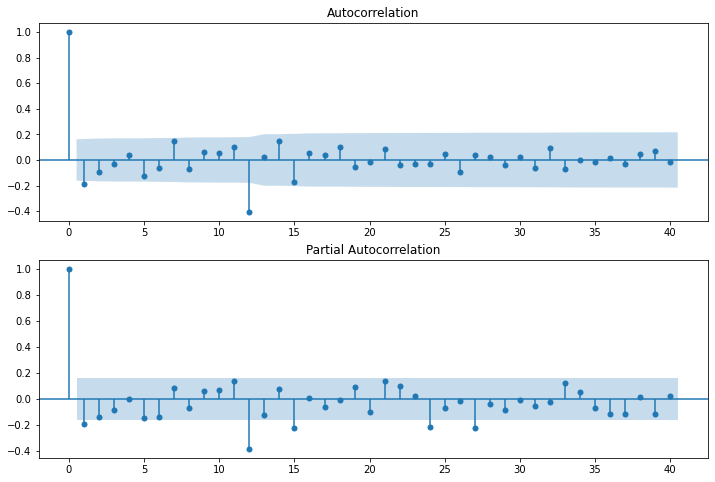

In [60]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_train['Seasonal_2nd_diff'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_train['Seasonal_2nd_diff'], lags=40, ax=ax2)

In [61]:
import statsmodels.api as sm

In [222]:
model = sm.tsa.statespace.SARIMAX(df_train['RPM'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit()

C:\Users\compaq\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [223]:
df_train['forecast'] = model_fit.predict(130, 150, dynamic = True)

C:\Users\compaq\AppData\Local\Temp/ipykernel_8708/2993410652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['forecast'] = model_fit.predict(130, 150, dynamic = True)


<AxesSubplot:xlabel='Month'>

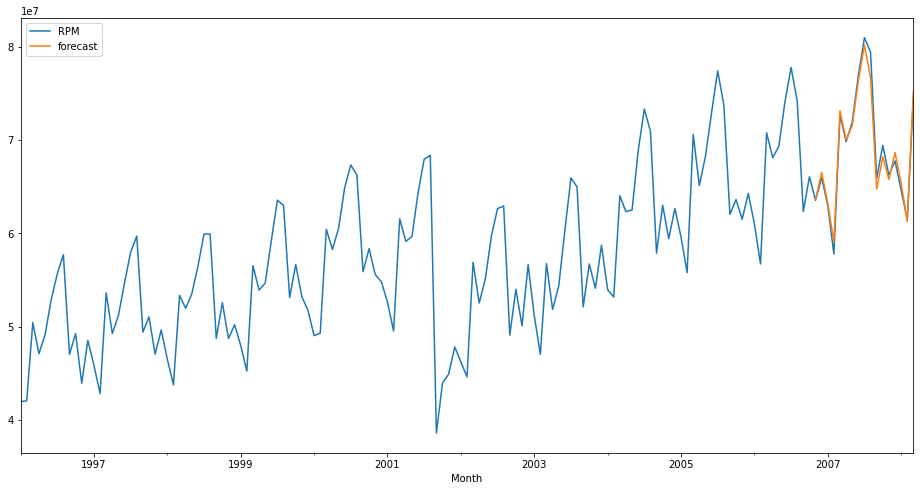

In [224]:
df_train[['RPM', 'forecast']].plot(figsize=(16, 8))

In [225]:
# Adding months for predictions

from pandas.tseries.offsets import DateOffset

In [226]:
future_dates = [df_train.index[-1] + DateOffset(months=x) for x in range(0, 1000)]

In [227]:
df_train_futuredates = pd.DataFrame(index=future_dates[1:], columns=df_train.columns)

In [228]:
df_train_futuredates.head()

,RPM,lag12,Seasonal_1st_diff,Seasonal_1st_diff (lag1),Seasonal_2nd_diff,forecast
2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2008-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
df_train_future = pd.concat([df_train, df_train_futuredates])

In [230]:
df_train_future

,RPM,lag12,Seasonal_1st_diff,Seasonal_1st_diff (lag1),Seasonal_2nd_diff,forecast
1996-01-01,41972194,45850623.0,-3878429.0,-784153.0,-3094276.0,NaN
1996-02-01,42054796,42838949.0,-784153.0,-3177949.0,2393796.0,NaN
1996-03-01,50443045,53620994.0,-3177949.0,-2170420.0,-1007529.0,NaN
1996-04-01,47112397,49282817.0,-2170420.0,-2073594.0,-96826.0,NaN
1996-05-01,49118248,51191842.0,-2073594.0,-1826711.0,-246883.0,NaN
...,...,...,...,...,...,...
2091-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2091-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2091-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2091-05-01,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\compaq\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

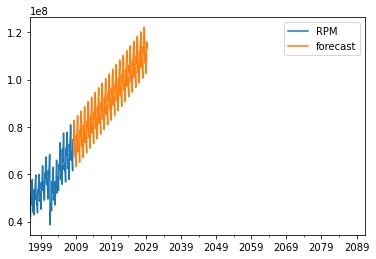

In [231]:
df_train_future['forecast'] = model_fit.predict(148, 400, dynamic = True)
df_train_future[['RPM', 'forecast']].plot()

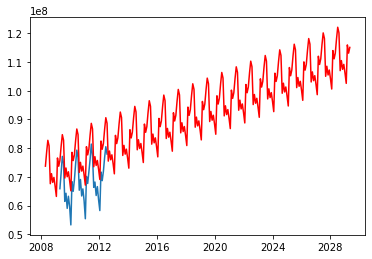

In [232]:
plt.plot(df_test['RPM'])
plt.plot(df_train_future['forecast'], color = 'red')
plt.show()